<a href="https://colab.research.google.com/github/FMDR-YU/r4ds/blob/main/C25Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
print("here")

[1] "here"


# **25. Many Models**
# Exercise 25.2.5

1. A linear trend seems to be slightly too simple for the overall trend. Can you do better with a **quadratic** polynomial? How can you interpret the coefficients of the quadratic? (Hint you might want to transform year so that it has mean zero.)

In [5]:
library(modelr)
library(tidyverse)
install.packages("gapminder")
library(gapminder)

by_country <- gapminder %>% 
  group_by(country, continent) %>% 
  nest()

by_country <- by_country %>% 
  mutate(
    one_mod = purrr::map(data, ~ lm(lifeExp ~ poly(year,1),data = .)),
    two_mod = purrr::map(data, ~ lm(lifeExp ~ poly(year,2),data = .)),
    three_mod = purrr::map(data, ~ lm(lifeExp ~ poly(year,3),data = .))
         )

by_country <- by_country %>% 
  mutate(
    one_resids = purrr::map2(data, one_mod, add_residuals),
    two_resids = purrr::map2(data, two_mod, add_residuals),
    three_resids = purrr::map2(data, three_mod, add_residuals)
  )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Unnesting...

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



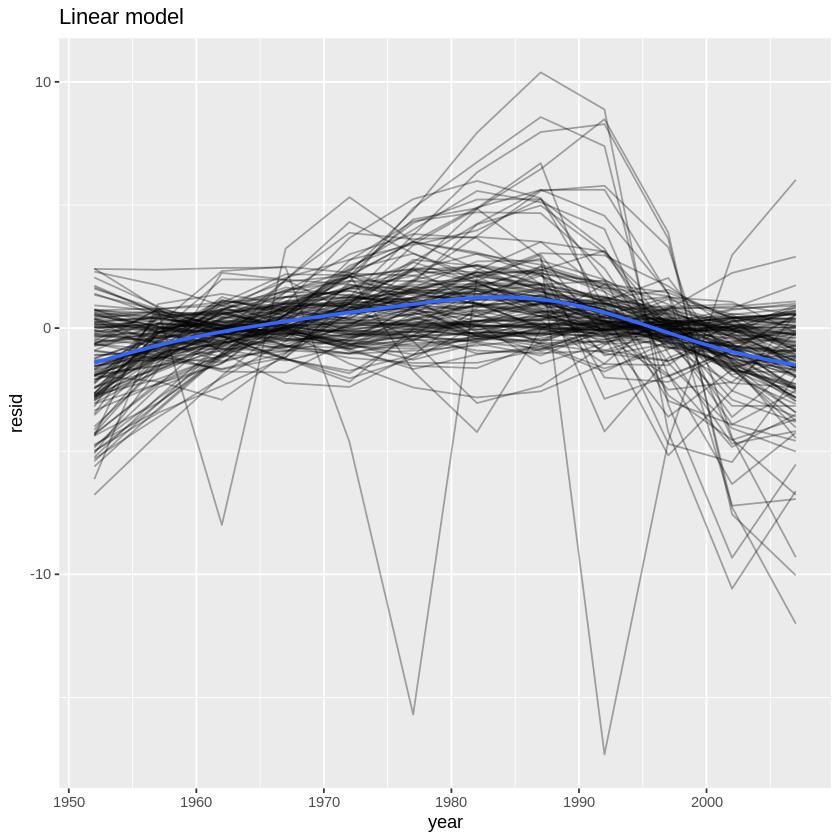

In [6]:
one_resids <- unnest(by_country, one_resids)
two_resids <- unnest(by_country, two_resids)
three_resids <- unnest(by_country, three_resids)

plot <- function(df,title){
    df %>% 
    ggplot(aes(year, resid)) +
    geom_line(aes(group = country), alpha = 1 / 3) + 
    geom_smooth(se = FALSE) +
    ggtitle(title)
}

plot(one_resids,"Linear model")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



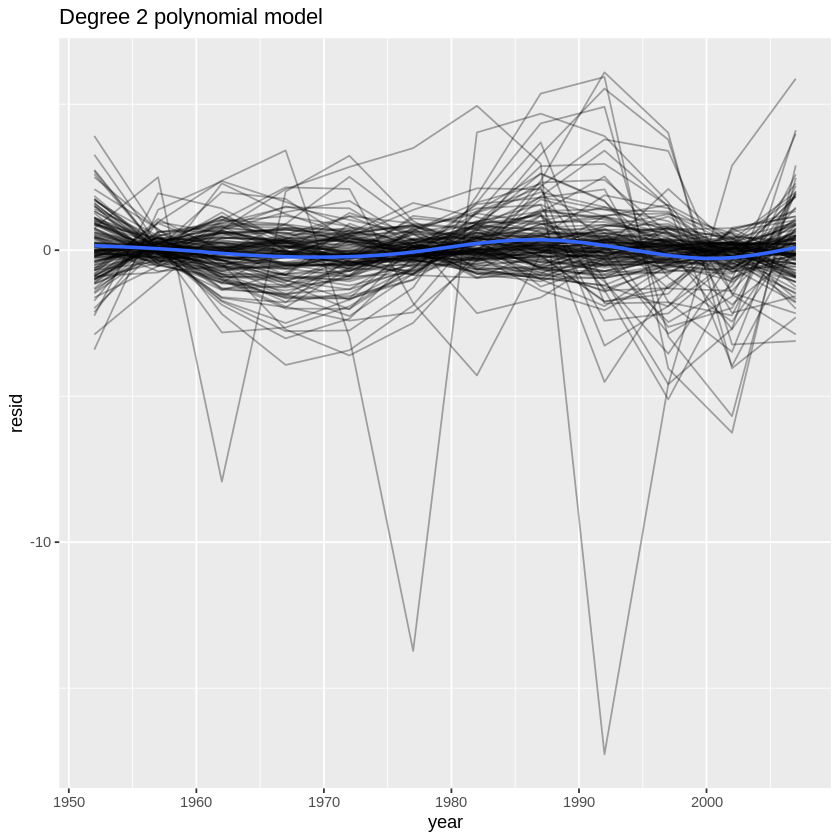

In [7]:
plot(two_resids,"Degree 2 polynomial model")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



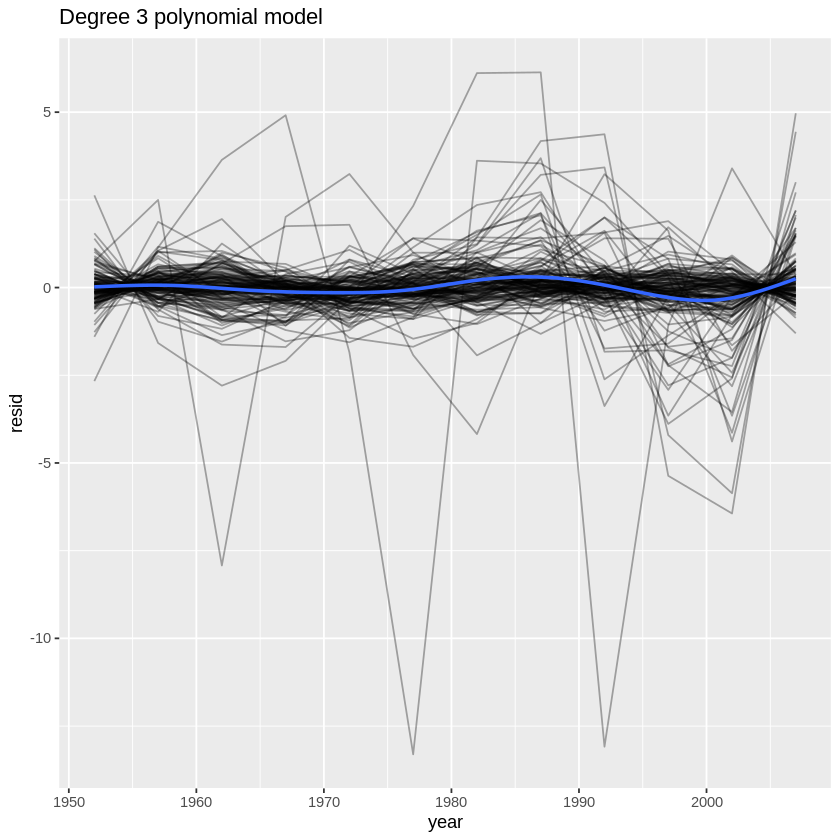

In [8]:
plot(three_resids,"Degree 3 polynomial model")

# ***“no copy/paste more than two times” rule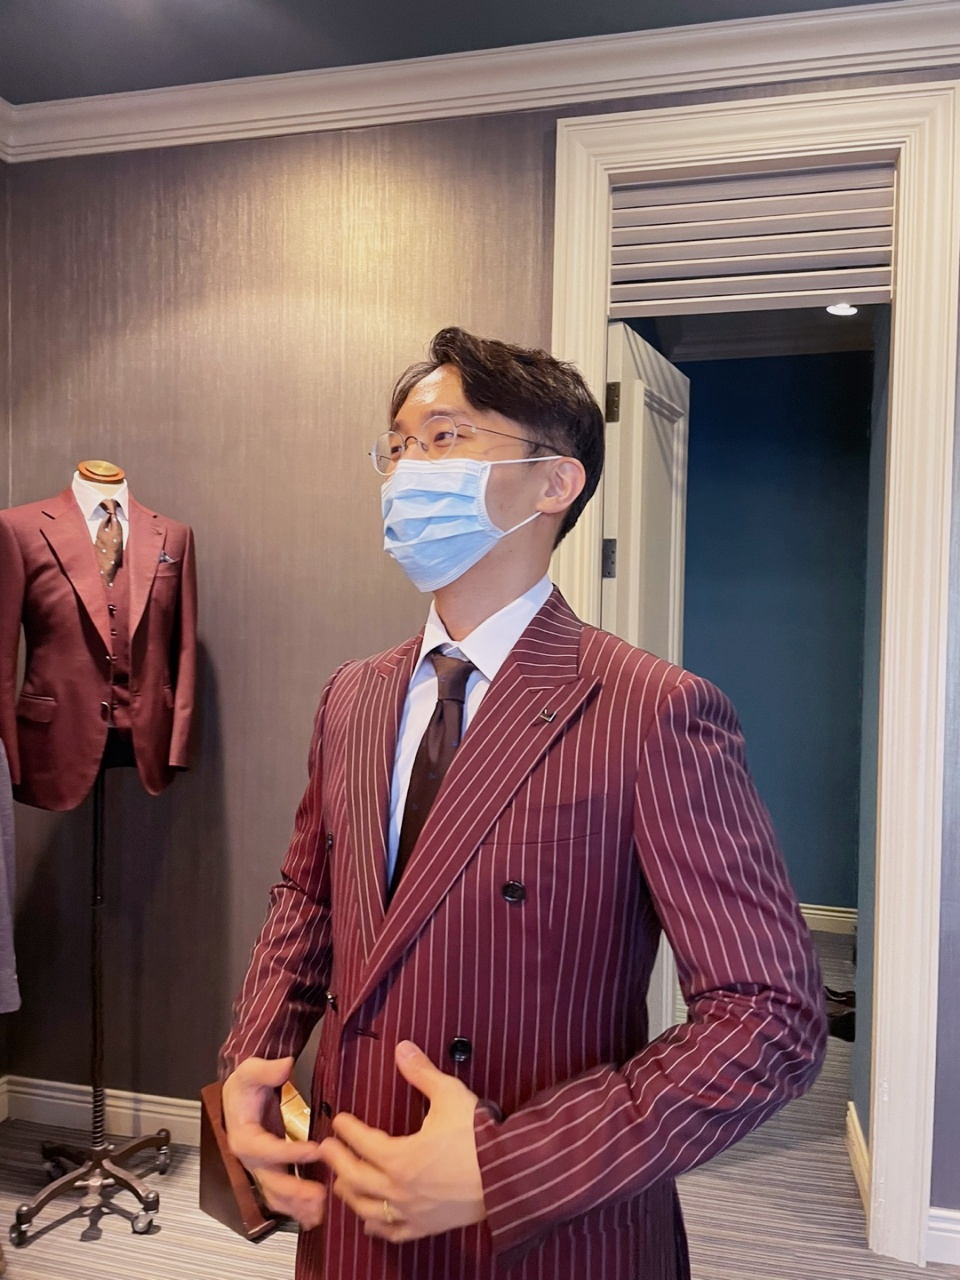***

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(one_glance, two_glance, three_glance))`, with `mutate()` if needed”


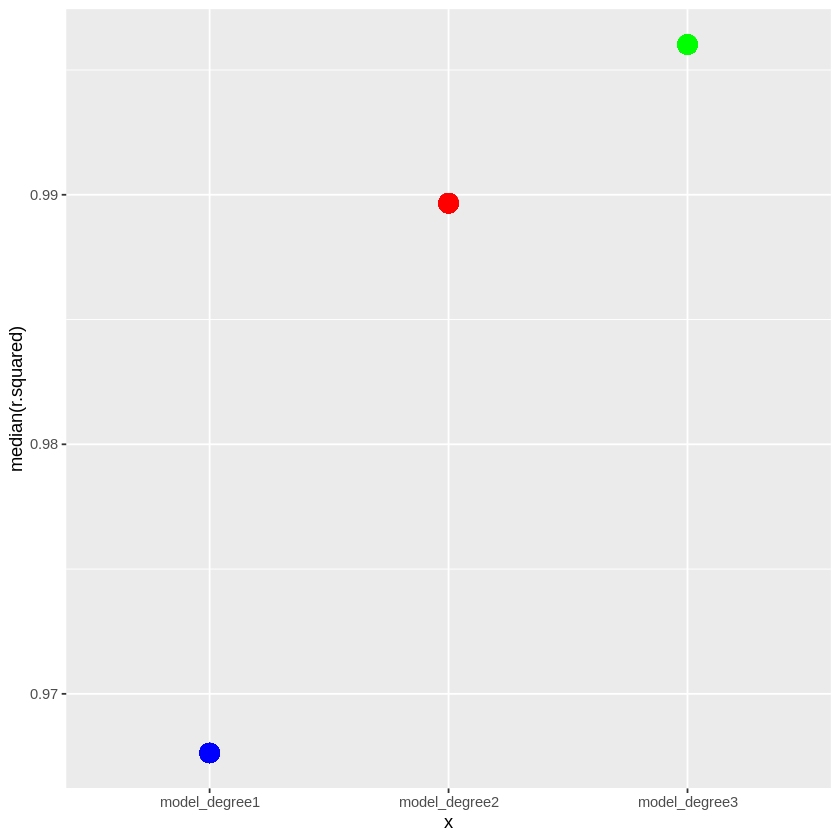

In [12]:
glance <- by_country %>% 
  mutate(one_glance = purrr::map(one_mod, broom::glance),
         two_glance = purrr::map(two_mod, broom::glance),
         three_glance = purrr::map(three_mod, broom::glance)) %>% 
  unnest(one_glance,two_glance,three_glance, .drop = TRUE)



glance %>% 
  ggplot() +
  geom_point(aes("model_degree1",median(r.squared)),color="blue", size = 5) +
  geom_point(aes("model_degree2",median(r.squared1)),color="red", size = 5) +
  geom_point(aes("model_degree3",median(r.squared2)),color="green", size = 5)